In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, RocCurveDisplay
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_csv("data.csv")

In [111]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [112]:
df.shape

(569, 33)

In [113]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [114]:
# Drop useless identifier or unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
if 'id' in df.columns:
    df = df.drop(columns=['id'])

print("Data shape after cleaning:", df.shape)
print("Columns:", df.columns.tolist())

Data shape after cleaning: (569, 31)
Columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [115]:
target_col = "diagnosis"
df[target_col] = df[target_col].map({'M': 1, 'B': 0})

In [116]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


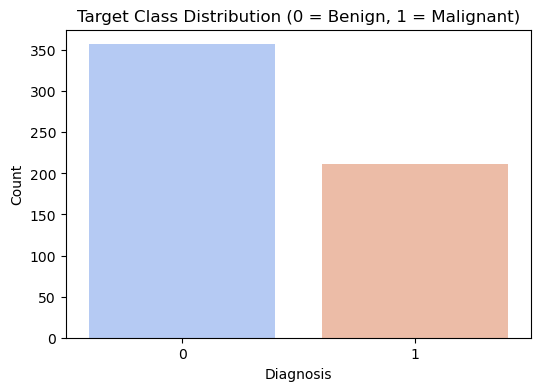

In [117]:
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, palette='coolwarm')
plt.title("Target Class Distribution (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

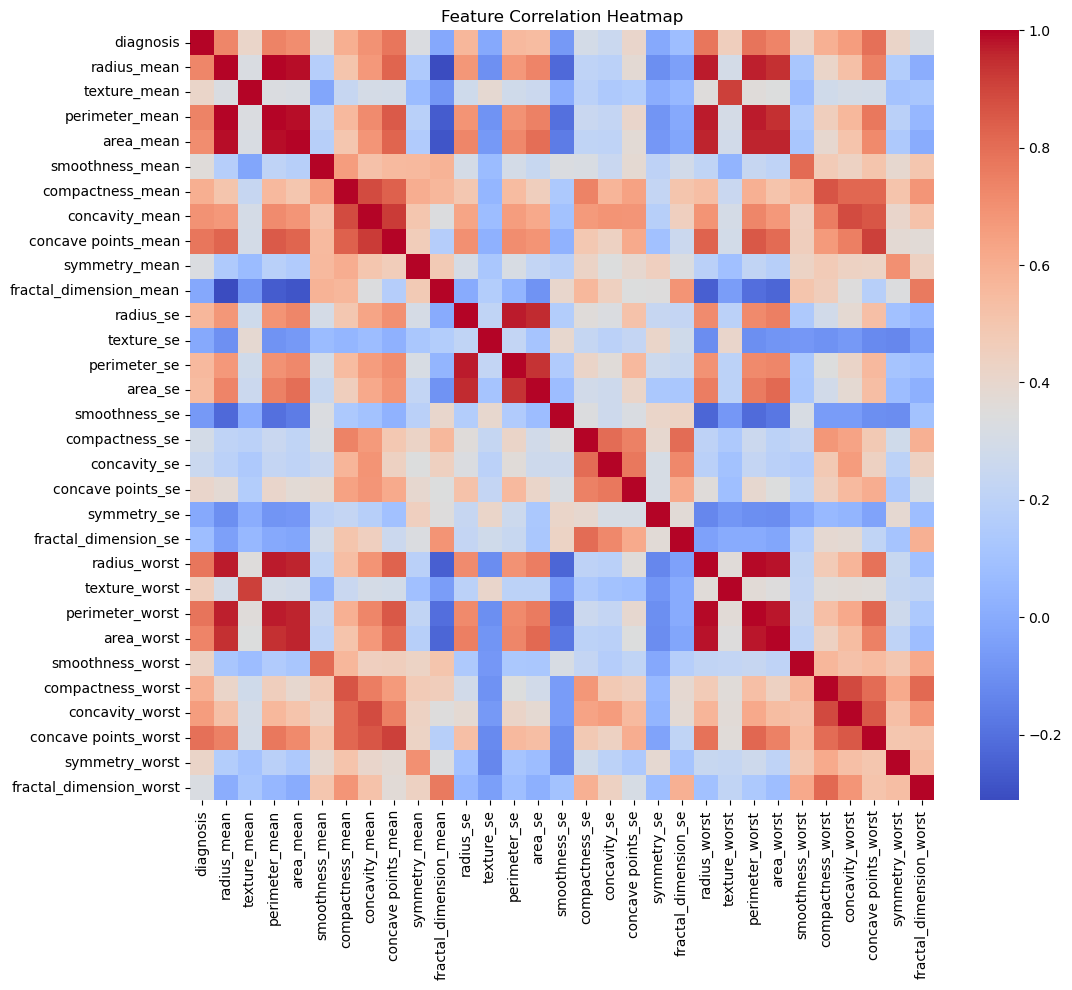

In [118]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

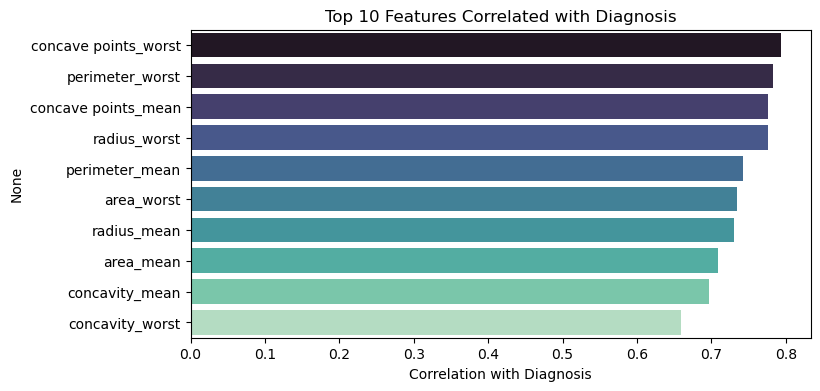

In [119]:
# Top 10 features correlated with target
target_corr = corr[target_col].abs().sort_values(ascending=False)[1:11]
plt.figure(figsize=(8,4))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='mako')
plt.title("Top 10 Features Correlated with Diagnosis")
plt.xlabel("Correlation with Diagnosis")
plt.show()

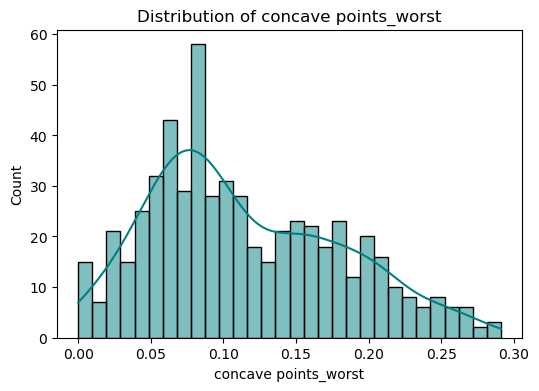

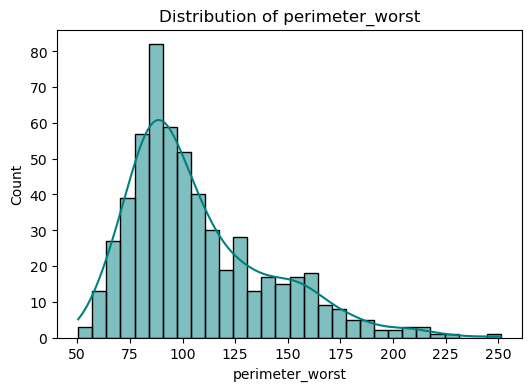

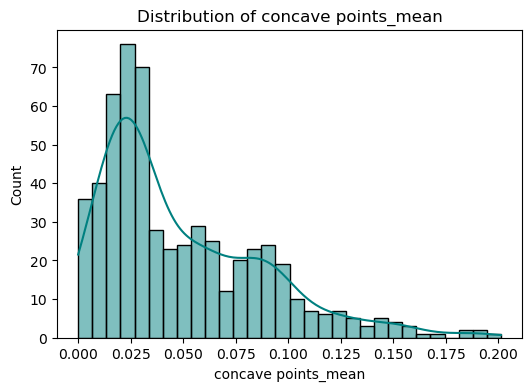

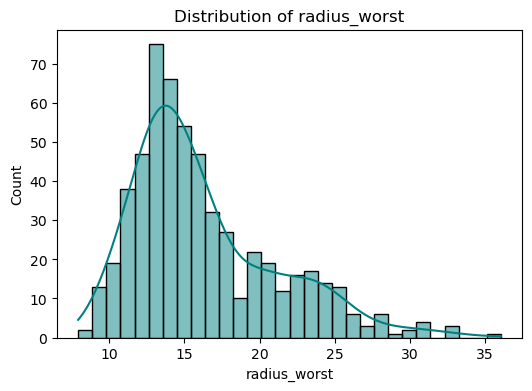

In [120]:
# Distribution of a few important features
important_features = target_corr.index[:4]

for col in important_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f"Distribution of {col}")
    plt.show()

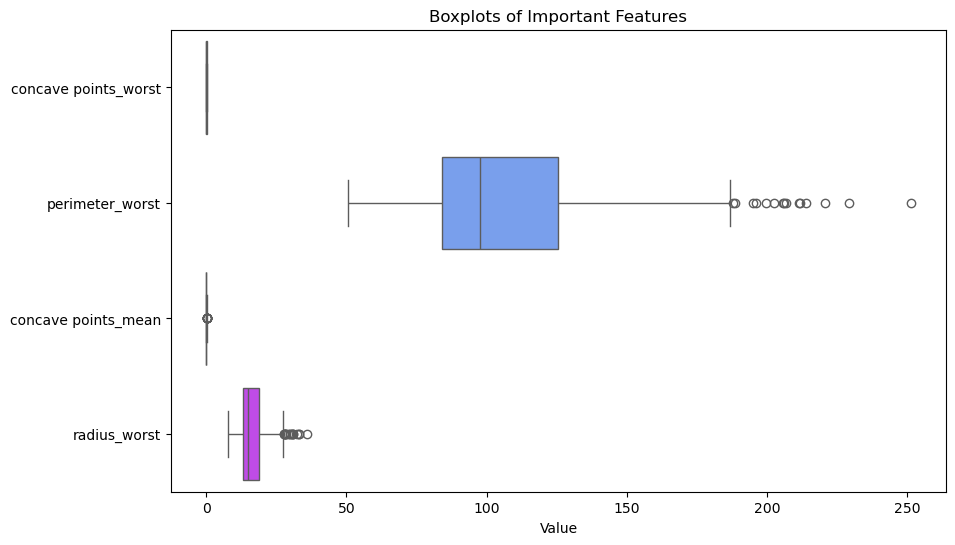

In [121]:
# Boxplots to Detect Outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[important_features], orient='h', palette='cool')
plt.title("Boxplots of Important Features")
plt.xlabel("Value")
plt.show()


In [122]:
#outlier detection
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_count = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers before treatment:\n", outlier_count.sort_values(ascending=False).head(10))


Outliers before treatment:
 area_se                    65
radius_se                  38
perimeter_se               38
area_worst                 35
smoothness_se              30
compactness_se             28
fractal_dimension_se       28
symmetry_se                27
area_mean                  25
fractal_dimension_worst    24
dtype: int64


In [123]:
df[num_cols] = df[num_cols].clip(lower=df[num_cols].quantile(0.01),
                              upper=df[num_cols].quantile(0.99), axis=1)

In [124]:
from scipy.stats import skew

skewed = df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_cols = skewed[abs(skewed) > 1].index.tolist()
print("\nHighly skewed columns:", skewed_cols)



Highly skewed columns: ['area_se', 'fractal_dimension_se', 'perimeter_se', 'symmetry_se', 'radius_se', 'compactness_se', 'area_worst', 'concavity_se', 'smoothness_se', 'area_mean', 'concavity_mean', 'compactness_worst', 'fractal_dimension_worst', 'compactness_mean', 'concave points_mean', 'texture_se', 'perimeter_worst', 'radius_worst', 'symmetry_worst']


In [125]:
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTrain shape:", X_train.shape, "| Test shape:", X_test.shape)



Train shape: (455, 30) | Test shape: (114, 30)


In [126]:
#pipeline
pipe_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, C=0.5, random_state=42))
])

In [127]:
pipe_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        n_estimators=150,
        max_depth=5,         # limit depth to avoid overfitting
        min_samples_split=5,
        random_state=42
    ))
])

In [128]:
pipe_svm = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='poly', degree=3, C=0.8, probability=True, random_state=42))
])

In [129]:
pipe_knn = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan'))
])

In [130]:
models = {
    "Logistic Regression": pipe_lr,
    "Random Forest": pipe_rf,
    "SVM": pipe_svm,
    "KNN": pipe_knn
}


In [131]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}
for name, model in models.items():
    auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc').mean()
    cv_results[name] = auc
    print(f"{name} CV ROC AUC: {auc:.4f}")


Logistic Regression CV ROC AUC: 0.9957
Random Forest CV ROC AUC: 0.9869
SVM CV ROC AUC: 0.9930
KNN CV ROC AUC: 0.9875



===== Logistic Regression =====
Accuracy: 0.9825
ROC AUC: 0.9964
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



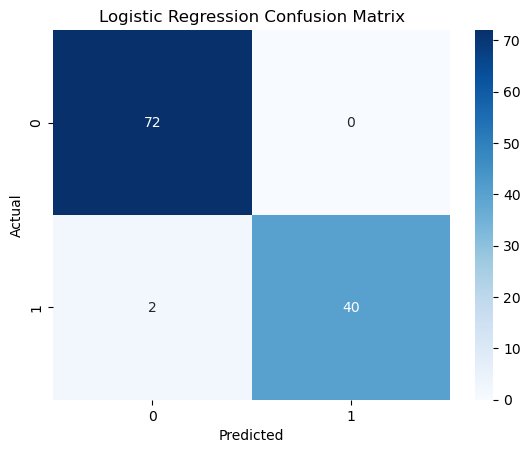


===== Random Forest =====
Accuracy: 0.9649
ROC AUC: 0.9940
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



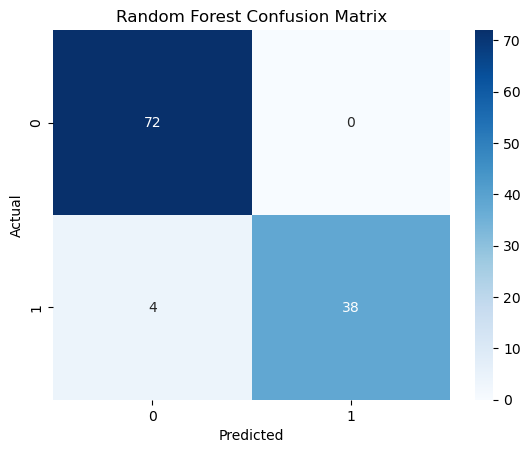


===== SVM =====
Accuracy: 0.8860
ROC AUC: 0.9967
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        72
           1       1.00      0.69      0.82        42

    accuracy                           0.89       114
   macro avg       0.92      0.85      0.87       114
weighted avg       0.90      0.89      0.88       114



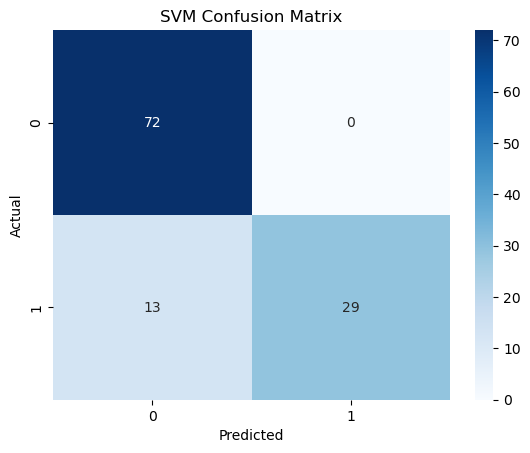


===== KNN =====
Accuracy: 0.9561
ROC AUC: 0.9970
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



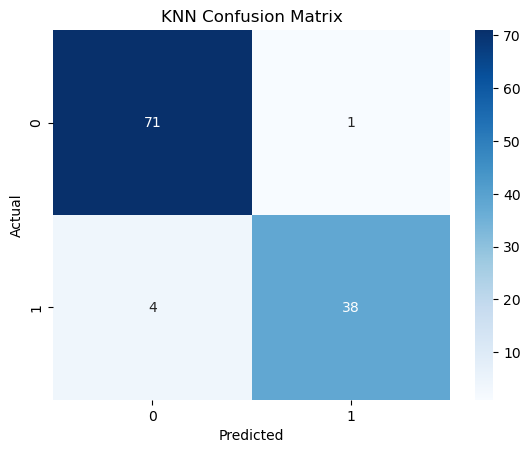

In [132]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append({"Model": name, "Accuracy": acc, "ROC_AUC": auc})

    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


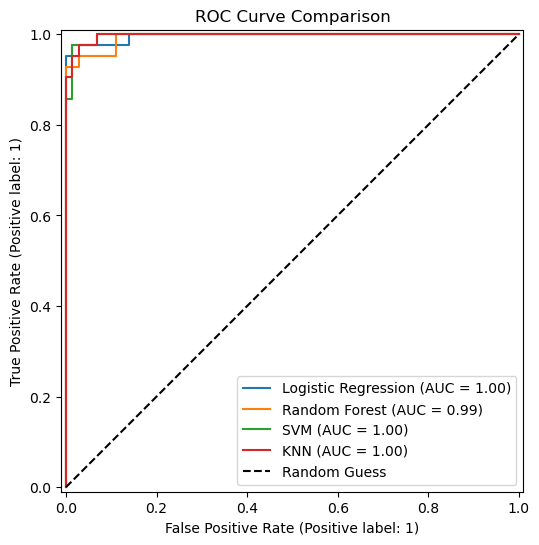

In [133]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob, name=name, ax=plt.gca())

plt.plot([0,1],[0,1],'k--',label='Random Guess')
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()



In [134]:

results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:\n", results_df)
best_acc = results_df.loc[results_df['Accuracy'].idxmax()]
best_auc = results_df.loc[results_df['ROC_AUC'].idxmax()]

print(f"\n✅ Best Model by Accuracy → {best_acc['Model']} "
      f"(Accuracy: {best_acc['Accuracy']:.4f})")

print(f"✅ Best Model by ROC-AUC → {best_auc['Model']} "
      f"(ROC-AUC: {best_auc['ROC_AUC']:.4f})")



📊 Model Comparison:
                  Model  Accuracy   ROC_AUC
0  Logistic Regression  0.982456  0.996362
1        Random Forest  0.964912  0.994048
2                  SVM  0.885965  0.996693
3                  KNN  0.956140  0.997024

✅ Best Model by Accuracy → Logistic Regression (Accuracy: 0.9825)
✅ Best Model by ROC-AUC → KNN (ROC-AUC: 0.9970)


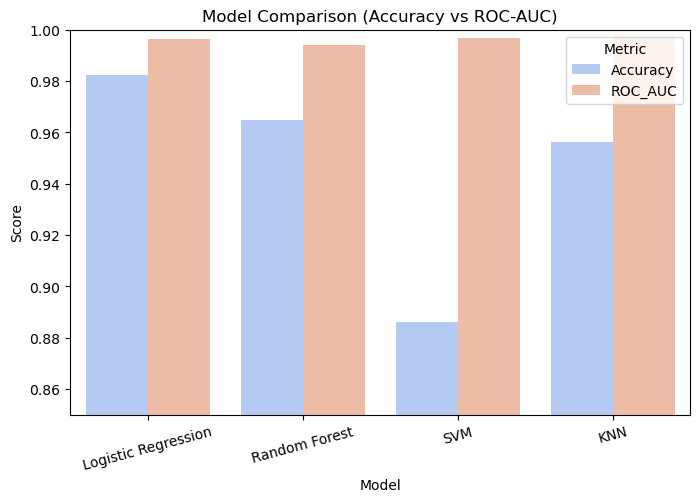

In [135]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
    x='Model', y='Score', hue='Metric', palette='coolwarm'
)
plt.title("Model Comparison (Accuracy vs ROC-AUC)")
plt.ylim(0.85, 1.0)
plt.xticks(rotation=15)
plt.legend(title="Metric")
plt.show()


In [138]:
import pickle

# binary mode me open karo
with open("breast_cancer_lr_model.pkl", "rb") as f:
    model = pickle.load(f)

print("Model loaded successfully ✅")
print("Model type:", type(model))


Model loaded successfully ✅
Model type: <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [139]:
import pickle
import os

# Folder ensure karo
os.makedirs("models", exist_ok=True)

# Save the model properly
with open("models/breast_cancer_best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [140]:
with open("models/breast_cancer_best_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("✅ Model loaded successfully!")
print("Model type:", type(loaded_model))


✅ Model loaded successfully!
Model type: <class 'pandas.core.series.Series'>


In [141]:
import pickle
import os

# 👇 Ye variable wahi hona chahiye jisme tumhara trained model stored hai
# Example: best_model, lr_model, knn_model, etc.
best_model = lr_model   # <- yahan apna model variable likho

# Folder ensure karo
os.makedirs("models", exist_ok=True)

# ✅ Save the actual trained model (not predictions)
with open("models/breast_cancer_best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("✅ Model saved successfully!")


NameError: name 'lr_model' is not defined